
 Now you're ready to tackle the real world, where house prices depend on more than just square footage. In this lab, you'll build a **multi-feature prediction model** that considers size, bedrooms, floors, and age simultaneously!

## 🏠 Real Estate Challenge: The Complete Picture

While single-variable regression was a great start, real estate pricing is much more complex:

- **Size matters** - but so does the number of **bedrooms**
- **Multiple floors** can increase value significantly  
- **Age of the house** often affects market price
- **All features interact** to determine the final price

Your mission: Build a sophisticated model that captures these complex relationships!

##  What You'll Master in This Lab

1. **Multiple Linear Regression** - Handle multiple input features simultaneously
2. **Vector Operations in NumPy** - Leverage efficient mathematical computations
3. **Feature Scaling Techniques** - Ensure optimal algorithm performance
4. **Gradient Descent for Multiple Variables** - Extend your optimization skills

In [37]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2) 

In [38]:
# load the dataset
data = np.loadtxt("stat362/student/Datasets/houses.txt", delimiter=',')
X_train, y_train = data[:,:-1], data[:,-1]

In [39]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")

X Shape: (100, 4), X Type:<class 'numpy.ndarray'>)
y Shape: (100,), y Type:<class 'numpy.ndarray'>)


In [40]:

b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


##  MLR: Single Prediction

For a single prediction, you can use loop vs vector way

**Loop Notation**

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$

**Vector Notation (The Elegant Way):**

$$
f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b \quad (2)
$$

where $\cdot$ is a vector **dot product**.


###  Single Prediction, loop

In [41]:
def predict_single_loop(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (m,) example with multiple features
      w (ndarray): Shape (m,) model parameters, each feature has a weight/parameter    
      b (scalar):  model bias parameter     
      
    Returns:
      p (scalar):  prediction
    """
    m = x.shape[0]
    p = 0
    for i in range(m):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [42]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [952.   2.   1.  65.]
f_wb shape (), prediction: -575.5059514105919


Note the shape of `x_vec`. It is a 1-D NumPy vector with 4 elements, (4,). The result, `f_wb` is a scalar.

###  Single Prediction, vector



Noting that equation (1) above can be implemented using the dot product as in (2) above. We can make use of vector operations to simplify predictions.

Recall from the Python/Numpy lab that NumPy `np.dot()`[[link](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)] can be used to perform a vector dot product. 

In [43]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (m,) example with multiple features
      w (ndarray): Shape (m,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p   

In [44]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [952.   2.   1.  65.]
f_wb shape (), prediction: -575.5059514105919


Both approaches produce identical results, but understanding both will make you a stronger programmer!

### Why Learn Both Methods? 

- **Loop Method**: Builds mathematical intuition  
- **Vector Method**: Professional-grade efficiency
- **Foundation**: Prepares you for DL

##  Understanding `np.dot` - The Heart of DL

`np.dot` is fundamental in machine learning - it's the building block of neural networks and matrix operations.

### 🧮 What is a Dot Product?

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190413155221/dotproduct.png" width="600" height="300">

**Simple definition:** Multiply corresponding elements, then sum them up.

$$\text{dot product} = \sum_{i=0}^{n-1} a_i \times b_i$$

**Example:** `[1,2,3] · [4,5,6] = (1×4) + (2×5) + (3×6) = 4 + 10 + 18 = 32`

In [45]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
c = np.dot(a, b)
print(f"NumPy 1-D np.dot(a, b) = {c}, np.dot(a, b).shape = {c.shape} ") 
c = np.dot(b, a)
print(f"NumPy 1-D np.dot(b, a) = {c}, np.dot(a, b).shape = {c.shape} ")

NumPy 1-D np.dot(a, b) = 24, np.dot(a, b).shape = () 
NumPy 1-D np.dot(b, a) = 24, np.dot(a, b).shape = () 


###  Speed Test: Loops vs Vectorization

In [46]:
def my_dot(a, b): 
    """
   Compute the dot product of two vectors
 
    Args:
      a (ndarray (n,)):  input vector 
      b (ndarray (n,)):  input vector with same dimension as a
    
    Returns:
      x (scalar): 
    """
    x=0
    for i in range(a.shape[0]):
        x = x + a[i] * b[i]
    return x

In [47]:
import time
np.random.seed(1)
a = np.random.rand(10000000)  # very large arrays
b = np.random.rand(10000000)

tic = time.time()  # capture start time
c = np.dot(a, b)
toc = time.time()  # capture end time

print(f"np.dot(a, b) =  {c:.4f}")
print(f"Vectorized version duration: {1000*(toc-tic):.4f} ms ")

tic = time.time()  # capture start time
c = my_dot(a,b)
toc = time.time()  # capture end time

print(f"my_dot(a, b) =  {c:.4f}")
print(f"loop version duration: {1000*(toc-tic):.4f} ms ")

del(a);del(b)  #remove these big arrays from memory

np.dot(a, b) =  2501072.5817
Vectorized version duration: 10.0088 ms 
my_dot(a, b) =  2501072.5817
loop version duration: 903.1069 ms 



**The performance gap isn't just impressive - it's production-critical!**

###  The Technology Behind the Speed

- **SIMD Processing**: Your CPU executes operations on multiple numbers simultaneously
- **Optimized Libraries**: NumPy uses battle-tested C/Fortran libraries (BLAS, LAPACK)
- **Memory Efficiency**: Better cache usage and reduced overhead

###  Real-World Impact

- **Training Speed**: 10x-100x faster on large datasets  
- **Production Systems**: Faster inference = better user experience
- **Scalability**: Essential for deep learning and big data applications

**Bottom Line:** Loops teach the math, vectorization makes it production-ready!

## Gradient Descent for Multiple Linear Regression
You will implement gradient descent algorithm for multiple features. As in the last lab, you will need three functions.

- `compute_cost`
- `compute_gradient`
- `gradient_descent`

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(w, b)$ With Respect To $b$.

### Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:

$$
J(\mathbf{w}, b) = \frac{1}{2m} \sum_{i = 0}^{m-1} \Big(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}\Big)^2 \quad (3)
$$

where:

$$
f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b \quad (4)
$$

In contrast to the last lab, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars, supporting multiple features.


Below is an implementation of equations (3) and (4). Note that this uses a *standard pattern for this course* where a for loop over all `m` examples is used.

#### Task 1: Implement the `compute_cost` below to compute the cost $J(w,b)$.

Note that you need to use the dot product for single prediction

In [48]:
def compute_cost(X, y, w, b): 
    """
    Computes the cost function for multiple linear regression using Mean Squared Error.
    
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model weight parameters  
      b (scalar)       : model bias parameter
      
    Returns:
      cost (scalar): The cost J(w,b) representing how well the parameters
                     fit the training data. Lower cost = better fit.
    """
    ### START CODE HERE ###
    
    # Step 1: Get the number of training examples
    m = X.shape[0]
    
    # Step 2: Initialize cost accumulator
    cost = 0.0
    
    # Step 3: Loop through each training example
    for i in range(m): # YOUR CODE:  iterate through all examples:                                
        
        # Step 4: Calculate prediction for example i using vectorized dot product
        f_wb_i = np.dot(X[i], w) + b # YOUR CODE
        
        # Step 5: Calculate squared error and add to cost
        cost = cost +  (f_wb_i - y[i])**2 # YOUR CODE
    
    # Step 6: Calculate final MSE cost (divide by 2m)
    cost = (1/(2*m)) * cost # YOUR CODE
    
    ### END CODE HERE ###
    return cost

#### Test your implementation and take the quiz on canvas

In [49]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 223609.44471317978


### Implement Gradient Descent With Multiple Variable Using Loop


Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples on the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction for the $i$ th example, while $y^{(i)}$ is the corresponding target value

The routine below implements equation (5) above.

#### Task 2: Implement the `compute_gradient` function with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. 

In this version, you will be asked to use for loops, specifically:

- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.

In [50]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for multiple linear regression using nested loops.
    
    The gradient tells us which direction to adjust our parameters (w, b) to reduce cost.
    For multiple features, we need gradients for each weight parameter and the bias.
    
    Mathematical foundations:
    - dJ/dw_j = (1/m) * Σ(error * x_j) for each feature j
    - dJ/db   = (1/m) * Σ(error) across all examples
    
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    ### START CODE HERE ###
    
    # Step 1: Get dimensions - number of examples (m) and features (n)
    m, n = X.shape[0], X.shape[1] # YOUR CODE
    
    # Step 2: Initialize gradient accumulators
    dj_dw = np.zeros((n,))  # Array to store gradients for each weight
    dj_db = 0.              # Scalar to store gradient for bias
    
    # Step 3: Outer loop - iterate through all training examples
    for i in range(m): # YOUR CODE: loop through examples:
        
        # Step 4: Calculate prediction error for current example
        f_wb_i = np.dot(X[i], w) + b
        err = f_wb_i - y[i]
        
        # Step 5: Inner loop - calculate gradient contribution for each feature
        for j in range(n): # YOUR CODE: loop through features
            # Gradient for weight j
            dj_dw[j] = dj_dw[j] + err * X[i, j] 
        
        # Step 6: Accumulate gradient for bias (no feature multiplication needed)
        dj_db = dj_db + err
    
    # Step 7: Average the accumulated gradients over all examples
    dj_dw = (1/m) * dj_dw 
    dj_db = (1/m) * dj_db
        
    ### END CODE HERE ###
    return dj_db, dj_dw

#### Test your implementation

You can check if your implementation was correct by running the following test code: Please fill in the blanks in the Canvas quiz accordingly

In [51]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -67.82209407939179
dj_dw at initial w,b: 
 [ 6.15e+03 -1.18e+02 -6.99e+00 -1.97e+04]


#### Task 3: Implement the `gradient_descent` function with Multiple Variables

In [52]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to optimize parameters w and b for multiple linear regression.
    
    This is the main optimization algorithm that iteratively improves our model parameters
    by moving them in the direction that reduces cost. Each iteration:
    1. Computes gradients (directions to move parameters)
    2. Updates parameters using the gradient descent rule
    3. Tracks progress for analysis
    
    Mathematical foundation:
    w := w - α * (∂J/∂w)    [Update weights]
    b := b - α * (∂J/∂b)    [Update bias]
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters (starting weights)  
      b_in (scalar)       : initial model parameter (starting bias)
      cost_function       : function to compute cost J(w,b)
      gradient_function   : function to compute gradients ∂J/∂w, ∂J/∂b
      alpha (float)       : Learning rate (step size for parameter updates)
      num_iters (int)     : number of iterations to run optimization
      
    Returns:
      w (ndarray (n,)) : Optimized weight parameters 
      b (scalar)       : Optimized bias parameter
      J_history (list): Cost at each iteration (for plotting learning curves)
    """
    
    # Initialize tracking arrays for visualization and analysis
    J_history = []
    w = copy.deepcopy(w_in)  # Create copy to avoid modifying input parameters
    b = b_in
    
    # Main optimization loop - iterate for specified number of steps
    for i in range(num_iters): 

        ### START CODE HERE ###
        
        # Step 1: Calculate gradients using your gradient function
        # This tells us which direction and how much to adjust each parameter
        dj_db, dj_dw = gradient_function(X, y, w, b)

        # Step 2: Update parameters using gradient descent rule
        # Move parameters in opposite direction of gradient (descent)
        w = w - alpha * dj_dw 
        b = b - alpha * dj_db
      
        # Step 3: Track progress by computing and storing current cost
        if i < 100000:  # Prevent memory issues for very long training runs
            current_cost = cost_function(X, y, w, b)
            J_history.append(current_cost)

        ### END CODE HERE ###
        
        # Display progress periodically (every 10% of total iterations)
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history  # Return optimized parameters and training history

#### Test Your Gradient Descent Implementation

**🧪 Validation Phase: Put Your Algorithm to the Test!**

Now it's time to see your gradient descent algorithm in action! The cell below will:

**What the test does:**

- **Initializes parameters** to zero (clean slate approach)
- **Runs 10,000 iterations** of gradient descent optimization  
- **Uses learning rate α = 5.0e-7** (carefully chosen for stability)
- **Tracks convergence** through the cost history

**Expected Results:**

- **Final cost** should be significantly lower than initial cost
- **Parameters (w, b)** should converge to reasonable values
- **Learning curve** should show steady cost reduction

**📋 Canvas Quiz Instructions:**

1. **Run the cell below** and observe the final parameter values
2. **Note the final cost** after 10,000 iterations
3. **Record the optimized weights** `w_final` and bias `b_final`
4. **Answer the corresponding questions** on Canvas with these values

**💡 Success Indicators:**

- Cost decreases consistently over iterations
- Parameters stabilize to meaningful values
- No warning messages or convergence issues

Ready to see your implementation work? Run the test below! ⬇️

In [53]:
%%time
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f}, {w_final} ")


Iteration    0: Cost  2069.28   
Iteration 1000: Cost  1430.06   
Iteration 2000: Cost  1374.73   
Iteration 3000: Cost  1352.70   
Iteration 4000: Cost  1343.91   
Iteration 5000: Cost  1340.38   
Iteration 6000: Cost  1338.94   
Iteration 7000: Cost  1338.34   
Iteration 8000: Cost  1338.06   
Iteration 9000: Cost  1337.92   
b,w found by gradient descent: 0.04, [ 0.27 -0.01 -0.04 -0.69] 
CPU times: user 1.21 s, sys: 32.5 ms, total: 1.25 s
Wall time: 1.24 s


#### 📈 Analyzing the Learning Curve: Understanding Convergence Behavior

**Why Learning Curves Matter:**

Learning curves are your **diagnostic tool** for understanding how well gradient descent is performing.

**Two-View Analysis:**

- **Left Plot**: Complete training history (full perspective)
- **Right Plot**: Tail end focus (detailed convergence behavior)

Let's visualize your algorithm's learning journey! 👇

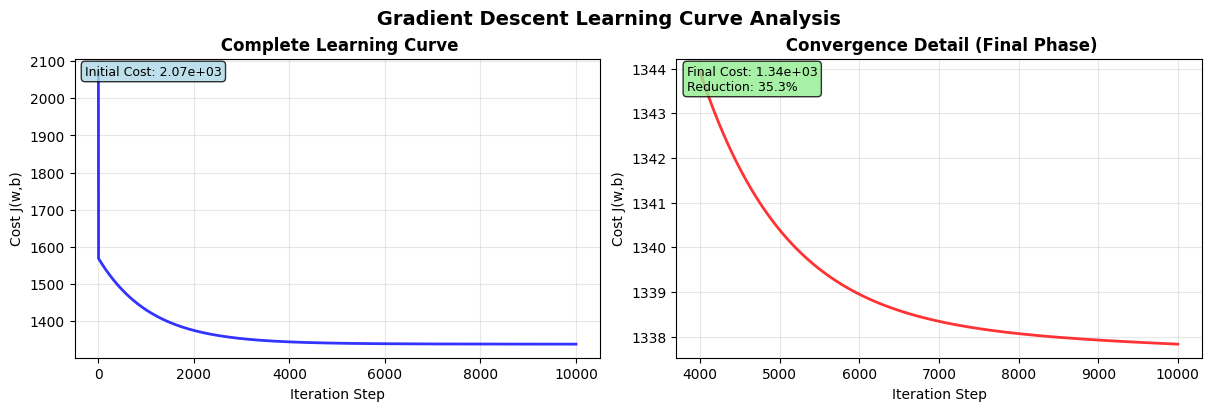


 LEARNING CURVE ANALYSIS SUMMARY
 Initial Cost:      2.07e+03
 Final Cost:       1.34e+03
 Cost Reduction:   35.35%
 Total Iterations: 10,000


In [54]:
# 📊 Visualize the learning curve to analyze gradient descent performance
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

# Left plot: Full training history
ax1.plot(J_hist, 'b-', linewidth=2, alpha=0.8)
ax1.set_title(" Complete Learning Curve", fontsize=12, fontweight='bold')
ax1.set_ylabel('Cost J(w,b)', fontsize=10)
ax1.set_xlabel('Iteration Step', fontsize=10)
ax1.grid(True, alpha=0.3)

# Right plot: Focus on tail end (last 60% of training)
start = 4000
tail_iterations = start + np.arange(len(J_hist[start:]))
ax2.plot(tail_iterations, J_hist[start:], 'r-', linewidth=2, alpha=0.8)
ax2.set_title(" Convergence Detail (Final Phase)", fontsize=12, fontweight='bold')
ax2.set_ylabel('Cost J(w,b)', fontsize=10)
ax2.set_xlabel('Iteration Step', fontsize=10)
ax2.grid(True, alpha=0.3)

# Add informative annotations
if len(J_hist) > 0:
    initial_cost = J_hist[0]
    final_cost = J_hist[-1]
    cost_reduction = ((initial_cost - final_cost) / initial_cost) * 100
    
    # Add cost reduction info to the plots
    ax1.text(0.02, 0.98, f'Initial Cost: {initial_cost:.2e}', 
             transform=ax1.transAxes, fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    ax2.text(0.02, 0.98, f'Final Cost: {final_cost:.2e}\nReduction: {cost_reduction:.1f}%', 
             transform=ax2.transAxes, fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.suptitle(' Gradient Descent Learning Curve Analysis', fontsize=14, fontweight='bold')
plt.show()

# 📋 Performance Summary
print("\n" + "="*50)
print(" LEARNING CURVE ANALYSIS SUMMARY")
print("="*50)
print(f" Initial Cost:      {J_hist[0]:,.2e}")
print(f" Final Cost:       {J_hist[-1]:,.2e}")
print(f" Cost Reduction:   {((J_hist[0] - J_hist[-1]) / J_hist[0]) * 100:.2f}%")
print(f" Total Iterations: {len(J_hist):,}")
print("="*50)

*These results are not inspiring*! Cost is still declining and our predictions are not very accurate. Let's next explore how to improve on this.

## Feature Scaling in Gradient Descent

Let's view the dataset and its features by plotting each feature versus price.

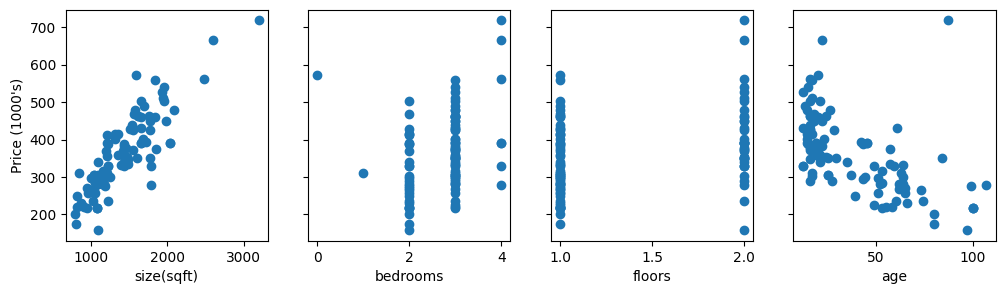

In [55]:
X_features = ['size(sqft)','bedrooms','floors','age']
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

As illustrated above, the features exhibit varying scales, a factor that holds significant importance in the gradient descent optimization algorithms, particularly when features span disparate orders of magnitude. Effective feature scaling is critical to ensure optimal convergence and performance. Two commonly used ways for feature scaling include: 
 [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) (also called z-score normalization or standardization) and [MinMax Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)


### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

$$
\begin{aligned}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \quad (9) \\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} \big(x^{(i)}_j - \mu_j\big)^2 \quad (10)
\end{aligned}
$$


To implement z-score normalization, adjust your input values as shown in this formula:

$$
x^{(i)}_j = \frac{x^{(i)}_j - \mu_j}{\sigma_j} \quad (8)
$$

where $j$ indexes a feature (a column in the matrix $\mathbf{X}$),  
$\mu_j$ is the mean of all the values for feature $j$, and  
$\sigma_j$ is the standard deviation of feature $j$.


>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.


#### Task 4: Implementation the `zscore_normalize_features` function below

In [56]:
def zscore_normalize_features(X):
    """
    Computes z-score normalization (standardization) of features by column.
    
    Z-score normalization transforms each feature to have:
    - Mean (μ) = 0 
    - Standard deviation (σ) = 1
    
    Mathematical Formula: x_norm = (x - μ) / σ
    
    This is crucial for gradient descent because:
    - Features on different scales can cause slow/poor convergence
    - Normalized features allow higher learning rates
    - Creates a more spherical cost function landscape
    
    Args:
      X (ndarray (m,n)): Input data matrix with m examples and n features
                         Each column represents one feature across all examples
      
    Returns:
      X_norm (ndarray (m,n)): Feature-normalized data (same shape as input)
                              Each feature now has mean≈0, std≈1  
      mu (ndarray (n,))     : Mean of each original feature (for future use)
      sigma (ndarray (n,))  : Standard deviation of each original feature
    """
    ### START CODE HERE ###
    
    # Step 1: Calculate mean of each feature (column-wise operation)
    # Hint: Use np.mean() with appropriate axis parameter
    mu = np.mean(X, axis=0) 
    
    # Step 2: Calculate standard deviation of each feature (column-wise)
    # Hint: Use np.std() with appropriate axis parameter  
    sigma = np.std(X, axis=0)
    
    # Step 3: Apply z-score normalization formula: (X - μ) / σ
    # This transforms each feature to have mean=0, std=1
    # Hint: Broadcasting will automatically handle the element-wise operations
    X_norm = (X - mu) / sigma
    
    ### END CODE HERE ###
    
    return (X_norm, mu, sigma)
 

Let's use your implementation to normalize the data and compare it to the original data.

In [57]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.41e+03 2.71e+00 1.38e+00 3.86e+01], 
X_sigma = [412.17   0.65   0.49  25.79]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.84 6.13 2.06 3.68]


#### Task 5: use the `StandardScaler` in Sklearn to check your implementation above and see whether you can get the same result

In [58]:
# please code below, ensure that the variable names match the printed information.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sklearn = scaler.fit_transform(X_train)
X_mu_sklearn = scaler.mean_
X_sigma_sklearn = scaler.scale_

In [59]:
print(f"X_mu_sklearn = {X_mu_sklearn}, \nX_sigma_sklearn = {X_sigma_sklearn}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu_sklearn = [1.41e+03 2.71e+00 1.38e+00 3.86e+01], 
X_sigma_sklearn = [412.17   0.65   0.49  25.79]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.84 6.13 2.06 3.68]


After feature scaling with z-score normalization, let's visualize the features again.

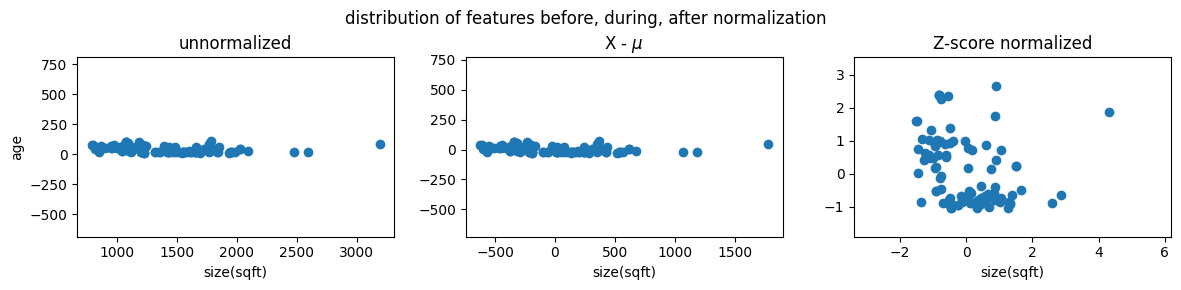

In [60]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

The plot above shows the relationship between two of the training set parameters, "age" and "size(sqft)". *These are plotted with equal scale*. 

- Left: Unnormalized: The range of values or the variance of the 'size(sqft)' feature is much larger than that of age
- Middle: The first step removes the mean or average value from each feature. This leaves features that are centered around zero. It's difficult to see the difference for the 'age' feature, but 'size(sqft)' is clearly around zero.
- Right: The second step divides by the standard deviation. This leaves both features centered at zero with a similar scale.

After feature scaling, the peak to peak range of each column is reduced from a factor of thousands to a factor of 2-3 by normalization.

In [61]:
from scipy.stats import norm
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data))*0.2
    x = np.linspace(np.min(data)-scale,np.max(data)+scale,50)
    _,bins, _ = ax.hist(data, x, color="xkcd:azure")
    #ax.set_ylabel("Count")
    
    mu = np.mean(data); 
    std = np.std(data); 
    dist = norm.pdf(bins, loc=mu, scale = std)
    
    axr = ax.twinx()
    axr.plot(bins,dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

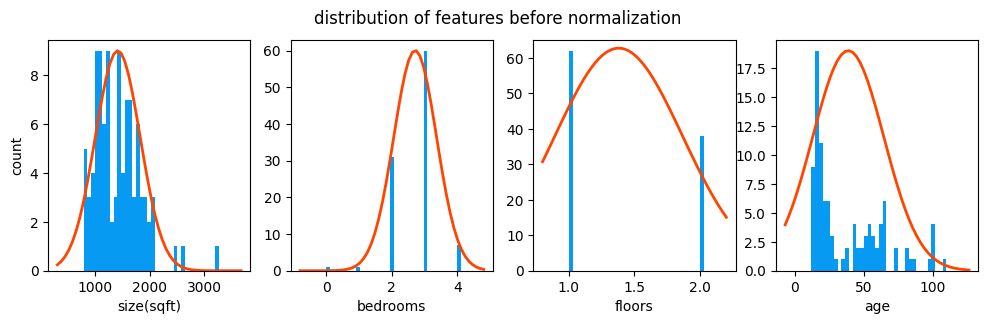

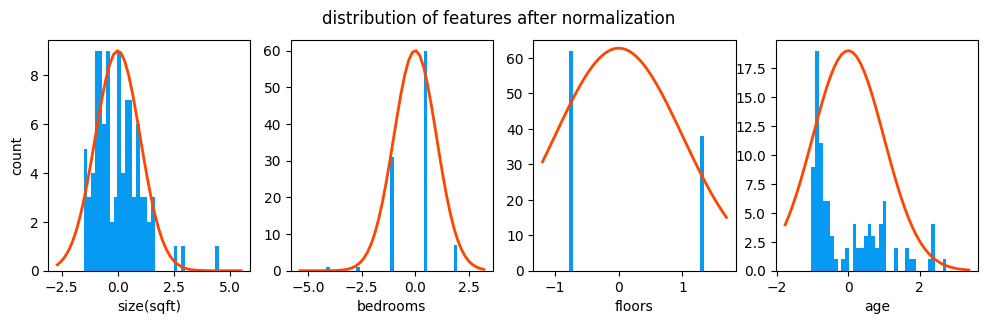

In [62]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

#### Task 6:  Testing Gradient Descent with Normalized Data

Now for the **exciting part** - let's see how feature scaling transforms our gradient descent performance! 

**What to expect:**

- **Faster and better convergence** - The algorithm should reach optimal values much quicker.

**Why this works:** When all features are on the same scale, gradient descent can take more direct paths toward the minimum, rather than zigzagging due to different feature magnitudes.

In [63]:
%%time
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 1.0e-3
# run gradient descent 
w_norm_final, b_norm_final, J_norm_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_norm_final:0.2f},{w_norm_final} ")


Iteration    0: Cost 70879.39   
Iteration 1000: Cost 10177.44   
Iteration 2000: Cost  1922.20   
Iteration 3000: Cost   634.31   
Iteration 4000: Cost   370.54   
Iteration 5000: Cost   288.89   
Iteration 6000: Cost   254.20   
Iteration 7000: Cost   237.33   
Iteration 8000: Cost   228.77   
Iteration 9000: Cost   224.38   
b,w found by gradient descent: 362.22,[107.6  -19.98 -30.96 -38.35] 
CPU times: user 1.22 s, sys: 47 ms, total: 1.27 s
Wall time: 1.26 s


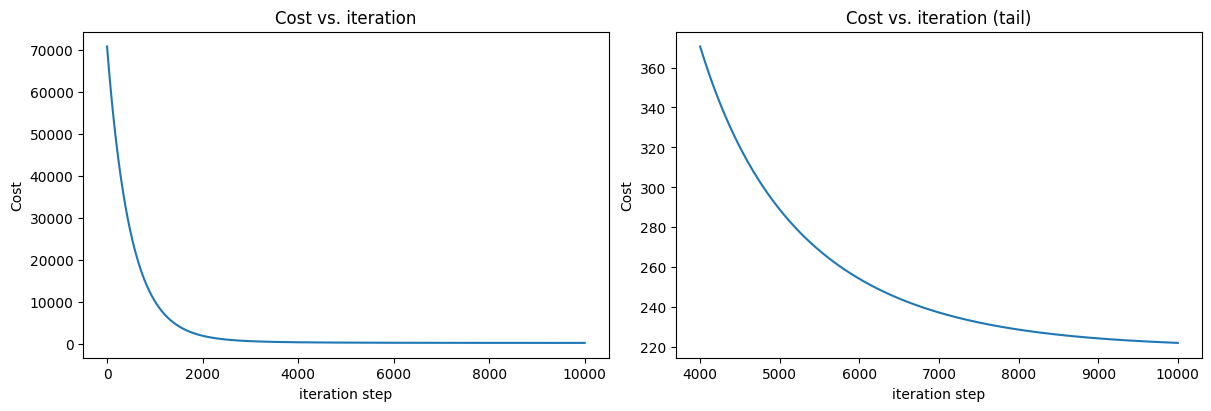

In [64]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_norm_hist)
start=4000
ax2.plot(start + np.arange(len(J_norm_hist[start:])), J_norm_hist[start:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

As evident from the above learning curve, the reduction in training cost accelerated notably after feature scaling. This enhancement underscores the pivotal role of feature scaling in expediting the convergence of gradient descent algorithms. Without proper scaling, these algorithms often endure oscillations, significantly delaying their journey towards the minimum point. Thus, feature scaling proves indispensable, particularly when dealing with features of varying orders of magnitude.


##  Bonus Exploration: Learning Rate Sensitivity Analysis

**Experiment Goal:** Investigate how different learning rates affect gradient descent performance with and without feature normalization.

###  What You'll Discover:

**Research Questions:**

1. How does learning rate choice impact convergence with unnormalized data?
2. Why can normalized data tolerate much larger learning rates?
3. What happens when learning rates are too high or too low?

*Try plotting the cost curves side-by-side to visualize the dramatic difference! and share your insights below*

Iteration    0: Cost 30897695622.92   
Iteration   20: Cost 107114777077806072736878388170430918901735269921372446526549090283831235817692408751829889420375055711770386177090161948413799202485977293940024141676544.00   
Iteration   40: Cost 371340815243651509924308671907904284384779397404387288409488222890149226918947341103461919170117175008353449484108100590817523639274612916163348868666417141260909388279137457382487844647300979514333772158047904836806213118162380206645924468575073147277189866468029369158571551050650197719777280.00   
Iteration   60: Cost      inf   
Iteration   80: Cost      inf   
Iteration  100: Cost      nan   
Iteration  120: Cost      nan   
Iteration  140: Cost      nan   
Iteration  160: Cost      nan   
Iteration  180: Cost      nan   
Iteration    0: Cost 3091379303671.97   
Iteration   20: Cost 108292827476378421840155897465444971484005188207806120836678924129411096427459949901485824782621378599849236954075045742552855683951555133779397822843101526393576496

/var/folders/91/fycdr3x950v8wr0g_cjdzy280000gn/T/ipykernel_36324/3753426723.py:30: RuntimeWarning: overflow encountered in scalar power
  cost = cost +  (f_wb_i - y[i])**2 # YOUR CODE
/var/folders/91/fycdr3x950v8wr0g_cjdzy280000gn/T/ipykernel_36324/259545173.py:41: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] = dj_dw[j] + err * X[i, j]
/var/folders/91/fycdr3x950v8wr0g_cjdzy280000gn/T/ipykernel_36324/2483159395.py:47: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * dj_dw
/var/folders/91/fycdr3x950v8wr0g_cjdzy280000gn/T/ipykernel_36324/259545173.py:41: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw[j] = dj_dw[j] + err * X[i, j]
/var/folders/91/fycdr3x950v8wr0g_cjdzy280000gn/T/ipykernel_36324/259545173.py:44: RuntimeWarning: overflow encountered in scalar add
  dj_db = dj_db + err
/var/folders/91/fycdr3x950v8wr0g_cjdzy280000gn/T/ipykernel_36324/2483159395.py:48: RuntimeWarning: invalid value encountered in scalar subtract
  b = b -

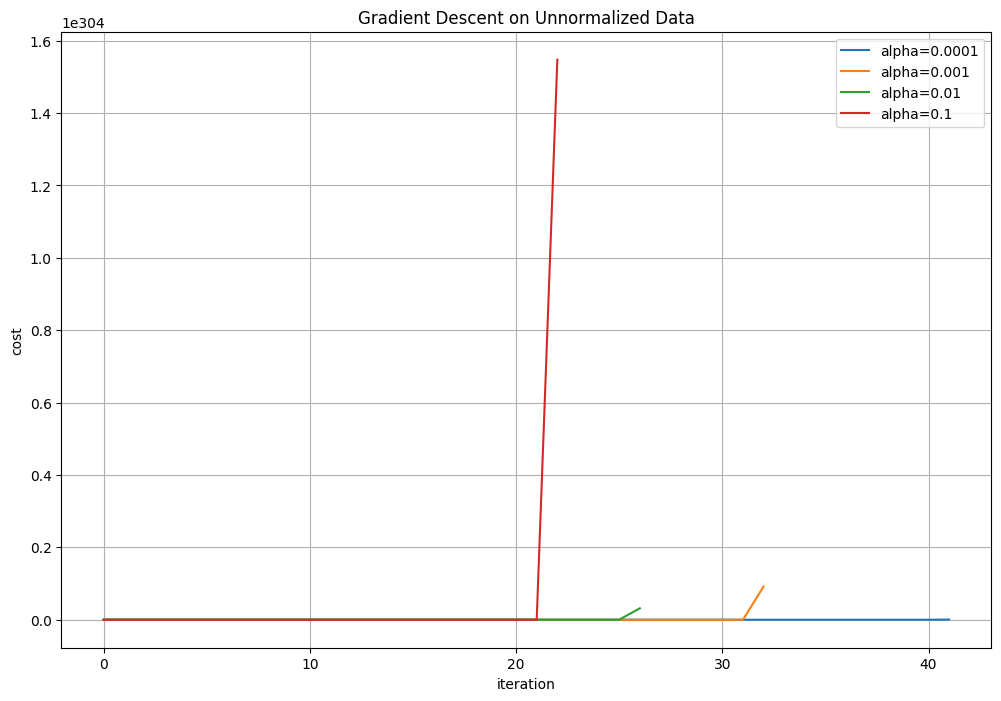

Iteration    0: Cost  2623.27   
Iteration   20: Cost  2612.77   
Iteration   40: Cost  2602.31   
Iteration   60: Cost  2591.90   
Iteration   80: Cost  2581.52   
Iteration  100: Cost  2571.19   
Iteration  120: Cost  2560.90   
Iteration  140: Cost  2550.66   
Iteration  160: Cost  2540.45   
Iteration  180: Cost  2530.28   
Iteration    0: Cost  2618.53   
Iteration   20: Cost  2515.56   
Iteration   40: Cost  2416.65   
Iteration   60: Cost  2321.63   
Iteration   80: Cost  2230.35   
Iteration  100: Cost  2142.67   
Iteration  120: Cost  2058.43   
Iteration  140: Cost  1977.52   
Iteration  160: Cost  1899.79   
Iteration  180: Cost  1825.12   
Iteration    0: Cost  2571.45   
Iteration   20: Cost  1718.74   
Iteration   40: Cost  1149.15   
Iteration   60: Cost   768.64   
Iteration   80: Cost   514.43   
Iteration  100: Cost   344.58   
Iteration  120: Cost   231.10   
Iteration  140: Cost   155.26   
Iteration  160: Cost   104.59   
Iteration  180: Cost    70.72   
Iteration 

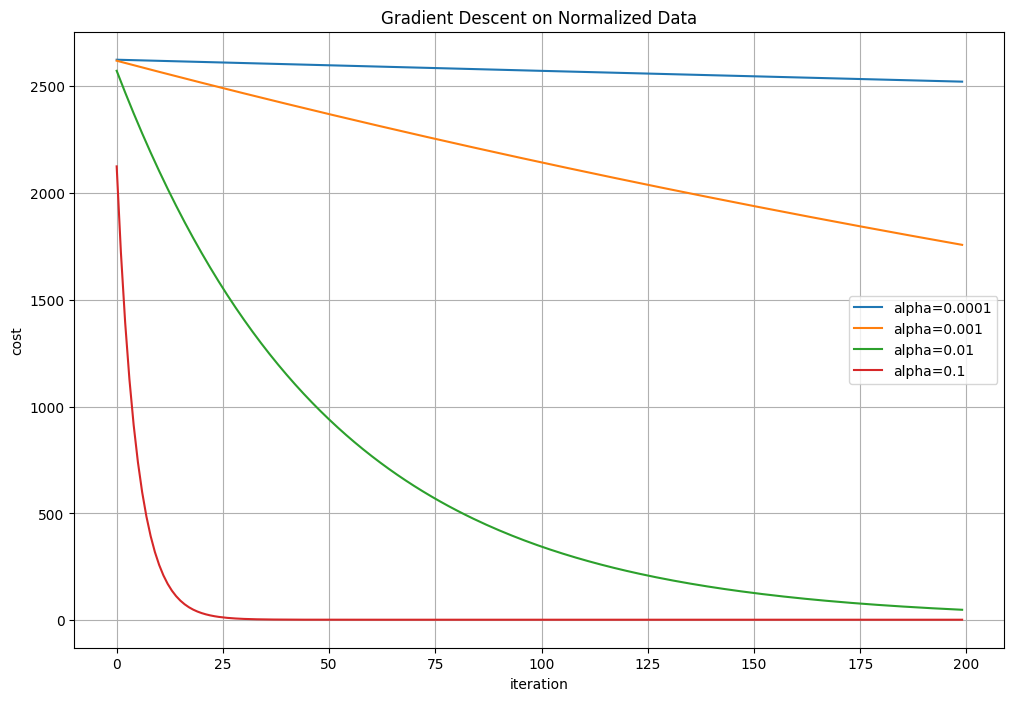

In [67]:
np.random.seed(25)
m = 100  # examples
n = 2    # features

X = np.zeros((m, n))
X[:, 0] = np.random.uniform(0, 10, m)       # features with a small range 
X[:, 1] = np.random.uniform(1000, 10000, m)  # features with a bigger range

true_w = np.array([2.0, 0.01])
true_b = 5.0

# using zscore normalization 
X_norm, mu, sigma = zscore_normalize_features(X)

# training params
num_iters = 200
learning_rates = [0.0001, 0.001, 0.01, 0.1]
initial_w = np.zeros(n)
initial_b = 0

# pre normalization
plt.figure(figsize=(12, 8))
for alpha in learning_rates:
    w_final, b_final, J_hist = gradient_descent(
        X, y, initial_w, initial_b, compute_cost, compute_gradient, alpha, num_iters
    )
    plt.plot(J_hist, label=f"alpha={alpha}")

plt.title("Gradient Descent on Unnormalized Data")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.legend()
plt.grid(True)
plt.show()

# normalized data
plt.figure(figsize=(12, 8))
for alpha in learning_rates:
    w_final, b_final, J_hist = gradient_descent(
        X_norm, y, initial_w, initial_b, compute_cost, compute_gradient, alpha, num_iters
    )
    plt.plot(J_hist, label=f"alpha={alpha}")

plt.title("Gradient Descent on Normalized Data")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.legend()
plt.grid(True)
plt.show()

1. How does learning rate choice impact convergence with unnormalized data?

**When a learning rate is too low, it converges very slowly, and when it is too high, it diverges. With unnormalized data specifically, when the learning rate is too large, it overshoots the minimum, diverges quickly, and the cost function jumps up incredibly high. When it is too small, it decreases really slowly and makes barely any progress over the iterations.**

2. Why can normalized data tolerate much larger learning rates?

**When data is normalized, the gradient descent curve is circular rather than a straight line with a huge increase. This means it can still converge, but quickly and smoothly.**

3. What happens when learning rates are too high or too low?

**When learning rates are too low, the cost decreases slowly and it takes a long time to reach a minimum. When it is too high, it overshoots the minimum. This is more common when the data is unnormalized because the features being large cuase it to descend in lartge strides. So, as can be seen in the chart above, the unnormalized data oscilates and diverges.**

##  Chapter Summary: Gradient Descent for Multiple Linear Regression & Feature Scaling

**Congratulations!** You’ve taken your understanding of multiple linear regression a step further by learning how to train it using gradient descent. Along the way, you also discovered how **feature scaling** can dramatically improve the efficiency of optimization. Let’s consolidate what you’ve learned:

###  Key Achievements in This Lab

**1. Gradient Descent for Multiple Linear Regression**

- ✅ Extended simple linear regression to handle multiple features simultaneously
- ✅ Mastered the mathematical foundations: $f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b$
- ✅ Implemented **single instance prediction** using vectorized `np.dot()` operations
- ✅ Built gradient descent for multiple variables using **nested for loops**


**2. Feature Scaling Breakthrough** 

- ✅ Discovered why feature scaling is **critical** for gradient descent optimization
- ✅ Implemented z-score normalization from scratch: $x^{(i)}_j = \frac{x^{(i)}_j - \mu_j}{\sigma_j}$
- ✅ Witnessed **dramatic performance improvements** 
- ✅ Understood the optimization landscape transformation

### 🔄 What We Built vs. What's Coming Next

**This Lab - Loop-Based Implementation:**

- Single prediction: **Vectorized** with `np.dot()`
- Cost computation: **For loop** over all training examples
- Gradient computation: **Nested for loops** over examples and features
- Perfect for **learning the mathematics** step-by-step

**Next Lab - Fully Vectorized Implementation:**

- **All operations** will be vectorized using NumPy matrix operations
- Eliminate **all for loops** for maximum computational efficiency
- Process **entire datasets** in single matrix operations
- Production-ready, **scalable** implementations

###  Why This Progressive Approach Matters


**Performance Evolution:**

- **Current**: Single prediction vectorized, batch processing with loops
- **Next**: Complete vectorization for production-scale performance
- **Impact**: From educational clarity to industrial-strength efficiency


###  What Awaits in the Next Lab

**Fully Vectorized Gradient Descent:**

- Matrix operations replacing all loops
- Simultaneous processing of entire datasets
- Production-level computational efficiency
- Foundation for DL techniques

**Bottom Line:** You've built rock-solid mathematical foundations using a clarity-first approach. Next, we'll transform this understanding into lightning-fast, production-ready implementations!

##  Reference

https://www.deeplearning.ai/